<a href="https://colab.research.google.com/github/yash2046/2216101_bootcamp_ml-concepts/blob/main/linear_emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/EmissionsData.csv")

In [2]:
df.head(10)

,SNO,ENGINESIZE,CO2EMISSIONS
0,0,2.0,196.0
1,1,2.4,221.0
2,2,1.5,136.0
3,3,3.5,255.0
4,4,3.5,244.0
5,5,3.5,230.0
6,6,3.5,232.0
7,7,3.7,232.0
8,8,3.7,255.0
9,9,2.4,267.0


In [3]:
df.shape

(14, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SNO           14 non-null     int64  
 1   ENGINESIZE    13 non-null     float64
 2   CO2EMISSIONS  12 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 464.0 bytes


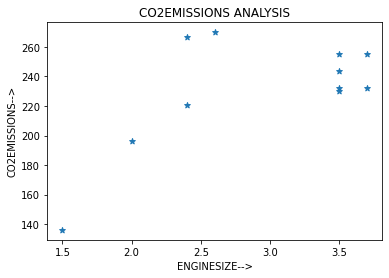

In [5]:
#step2
#visualizze the dataset
import matplotlib.pyplot as plt
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS,marker='*')
plt.xlabel("ENGINESIZE-->")
plt.ylabel("CO2EMISSIONS-->")
plt.title("CO2EMISSIONS ANALYSIS")
plt.show()

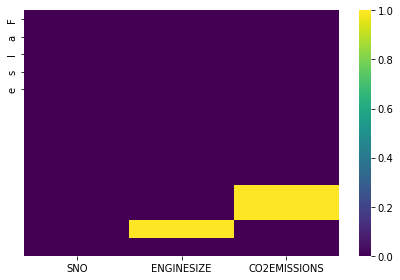

In [6]:
#seaborn
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels="False",cbar="False",cmap="viridis")
  plt.tight_layout()
  return plt.show()
get_heatmap(df)

In [7]:
#step3
#preprocessing the dataset
df=df.dropna()
df.head()

,SNO,ENGINESIZE,CO2EMISSIONS
0,0,2.0,196.0
1,1,2.4,221.0
2,2,1.5,136.0
3,3,3.5,255.0
4,4,3.5,244.0


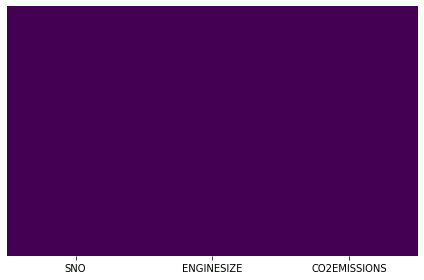

In [8]:
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  plt.tight_layout()
  return plt.show()
get_heatmap(df)

In [9]:
#step3
#preprocessing the dataset
import math
median_hours=math.floor(df.ENGINESIZE.median())
median_hours

3

In [10]:
df.ENGINESIZE=df.ENGINESIZE.fillna(median_hours)

In [12]:
mean_Scores=math.floor(df.CO2EMISSIONS.mean())
mean_Scores

230

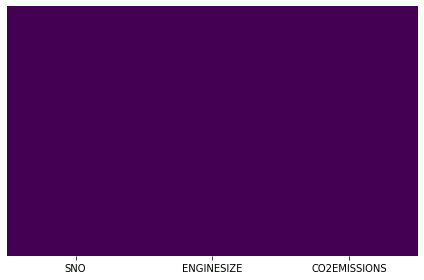

In [13]:
df.ENGINESIZE=df.ENGINESIZE.fillna(mean_Scores)


import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  plt.tight_layout()
  return plt.show()
get_heatmap(df)

In [14]:
#step 3 preparing thr data
X=df.iloc[0:,-2:-1].values
Y=df.iloc[:,-1:].values

In [15]:
X

array([[2. ],
       [2.4],
       [1.5],
       [3.5],
       [3.5],
       [3.5],
       [3.5],
       [3.7],
       [3.7],
       [2.4],
       [2.6]])

In [16]:
Y

array([[196.],
       [221.],
       [136.],
       [255.],
       [244.],
       [230.],
       [232.],
       [232.],
       [255.],
       [267.],
       [270.]])

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [18]:
X_train

array([[2.6],
       [3.5],
       [2.4],
       [3.7],
       [3.7],
       [3.5],
       [2. ],
       [3.5]])

In [19]:
#TRAINING MODELL
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [20]:
model.fit(X_train,Y_train)

LinearRegression()

In [21]:
#Predict
y_pred=model.predict(X_test)
y_pred

array([[242.53592696],
       [225.04684399],
       [210.73759428]])

In [22]:
print("Predicted value for training data:",model.score(X_train,Y_train))
print("Training accuracy:",model.score(X_train,Y_train)*100)

Predicted value for training data: 0.21113485584757263
Training accuracy: 21.113485584757264


In [24]:
print("Predicted value for testing data:",model.score(X_test,Y_test))
print("Testing accuracy:",model.score(X_test,Y_test)*100)

Predicted value for testing data: 0.24903739094667476
Testing accuracy: 24.903739094667475


In [25]:
accuracy=model.score(X,Y)*100
print(accuracy)

28.766650939623016


In [26]:
model.coef_

array([[15.89916634]])

In [27]:
model.intercept_

array([186.88884478])

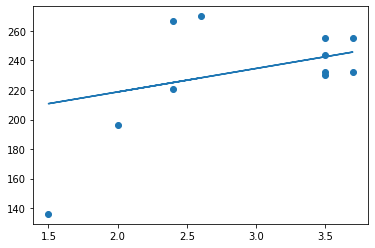

In [28]:
#VISUALIZING RESULTSS
#plotting the linear reg
line=model.coef_*X+model.intercept_
#y=mx+c
#plotting
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

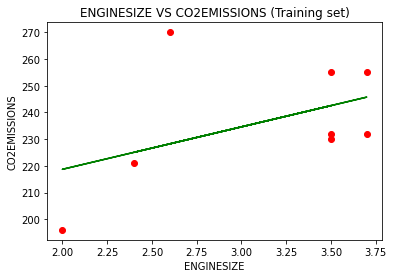

In [29]:
#trainset results
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,model.predict(X_train),color='green')
plt.title('ENGINESIZE VS CO2EMISSIONS (Training set)')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

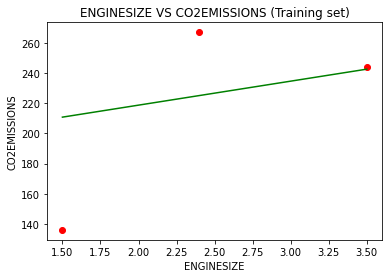

In [30]:
#testing results
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,model.predict(X_test),color='green')
plt.title('ENGINESIZE VS CO2EMISSIONS (Training set)')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()